# Signaux élémentaires

In [1]:
import numpy as np
from matplotlib.pyplot import figure, subplots, plot, xlabel, ylabel, xlim, ylim, title, savefig, show, rcParams
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

mpl.style.use('../src/signal.mplstyle')

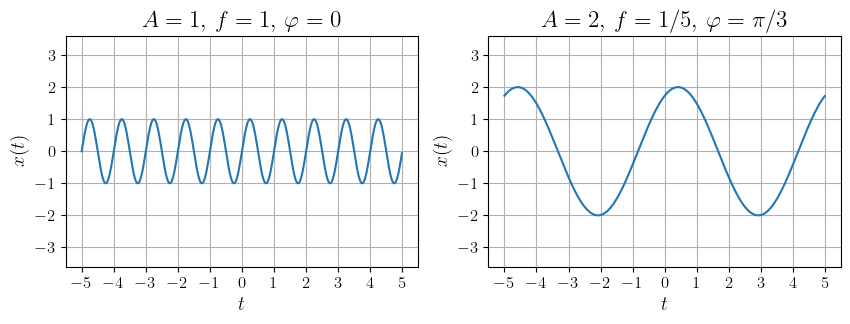

In [2]:
# Sinusoïde

t = np.arange(-5, 5, 0.01)
a1, f1, phi1 = 1, 1, 0
a2, f2, phi2 = 2, .2, np.pi/3
x1 = a1 * np.sin(2*np.pi*f1*t + phi1)
x2 = a2 * np.sin(2*np.pi*f2*t + phi2)

fig, (ax1, ax2) = subplots(1,2, figsize=(10,3))

ax1.plot(t,x1)
ax1.set_xlabel("$t$")
ax1.set_ylabel("$x(t)$")
ax1.set_title("$A = 1$, $f = 1$, $\\varphi = 0$")
ax1.set_ylim([-2.1, 2.1])
ax1.set_xticks(range(-5,6))
ax1.set_yticks(range(-5,6))
ax1.axis('equal')

ax2.plot(t,x2)
ax2.set_xlabel("$t$")
ax2.set_ylabel("$x(t)$")
ax2.set_title("$A = 2$, $f = 1/5$, $\\varphi = \\pi/3$")
ax2.set_ylim([-2.1, 2.1])
ax2.set_xticks(range(-5,6))
ax2.set_yticks(range(-5,6))
ax2.axis('equal')

savefig(f"sinusoide.svg")
show()

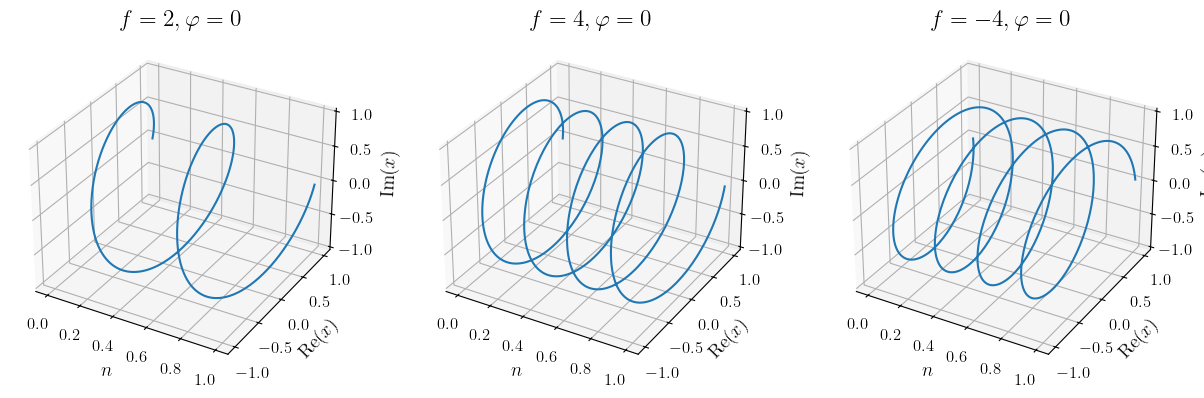

In [3]:
n = np.arange(0, 1, 0.002)

params = [[2, 0], [4, 0], [-4, 0]]

fig = figure(figsize=(15,8))
i = 0
for f, phi in params:
    
    i+=1
    ax = fig.add_subplot(1,3,i, projection='3d')
    
    x = np.exp(1j*2*np.pi*f*n + phi)
    
    ax.plot(n, np.real(x), np.imag(x))    
    ax.set_xlabel("$n$")
    ax.set_ylabel("$\\mathrm{Re}(x)$")
    ax.set_zlabel("$\\mathrm{Im}(x)$")
    ax.set_title(f"$f = {f}, \\varphi = {phi}$")
    
savefig(f"expo.svg")
show()

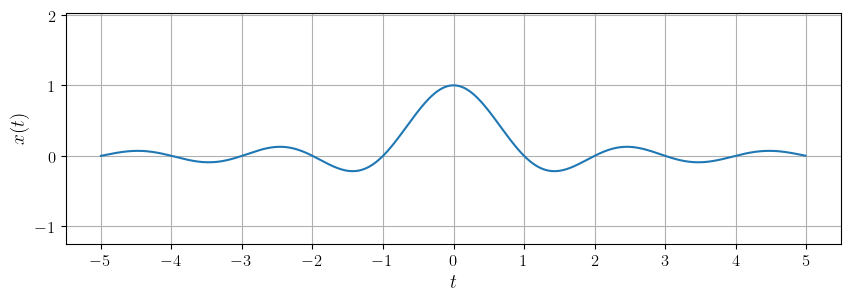

In [4]:
# Sinus cardinal

t = np.arange(-5, 5, 0.01)
x = np.sinc(t)

fig, ax = subplots(1,1, figsize=(10,3))

ax.plot(t,x)
ax.set_xlabel("$t$")
ax.set_ylabel("$x(t)$")
ax.set_xticks(range(-5,6))
ax.set_yticks(range(-5,6))
ax.axis('equal')
savefig(f"sinc.svg")
show()

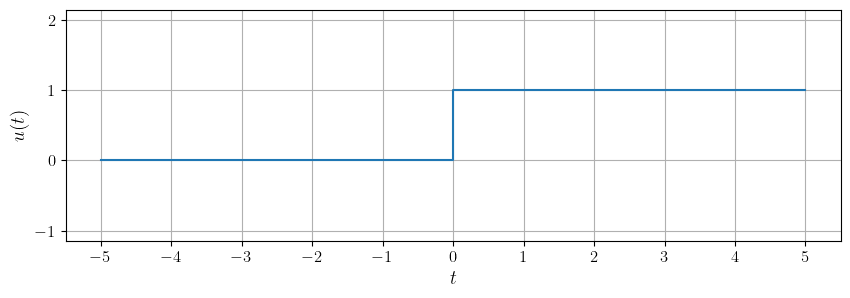

In [5]:
# Échelon

t = [-5, 0, 0, 5]
x = [0, 0, 1, 1]

fig, ax = subplots(1,1, figsize=(10,3))

ax.plot(t,x)
ax.set_xlabel("$t$")
ax.set_ylabel("$u(t)$")
ax.set_xticks(range(-5,6))
ax.set_yticks(range(-5,6))
ax.axis('equal')
savefig(f"echelon.svg")
show()

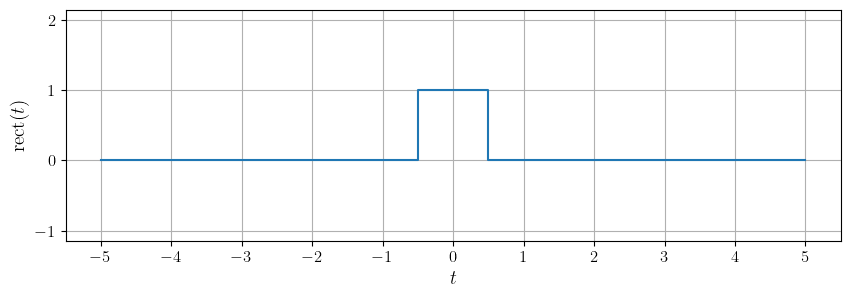

In [6]:
# Porte

t = [-5, -.5, -.5, .5, .5, 5]
x = [0, 0, 1, 1, 0, 0]

fig, ax = subplots(1,1, figsize=(10,3))

ax.plot(t,x)
ax.set_xlabel("$t$")
ax.set_ylabel("$\\mathrm{rect}(t)$")
ax.set_xticks(range(-5,6))
ax.set_yticks(range(-5,6))
ax.axis('equal')
savefig(f"porte.svg")
show()

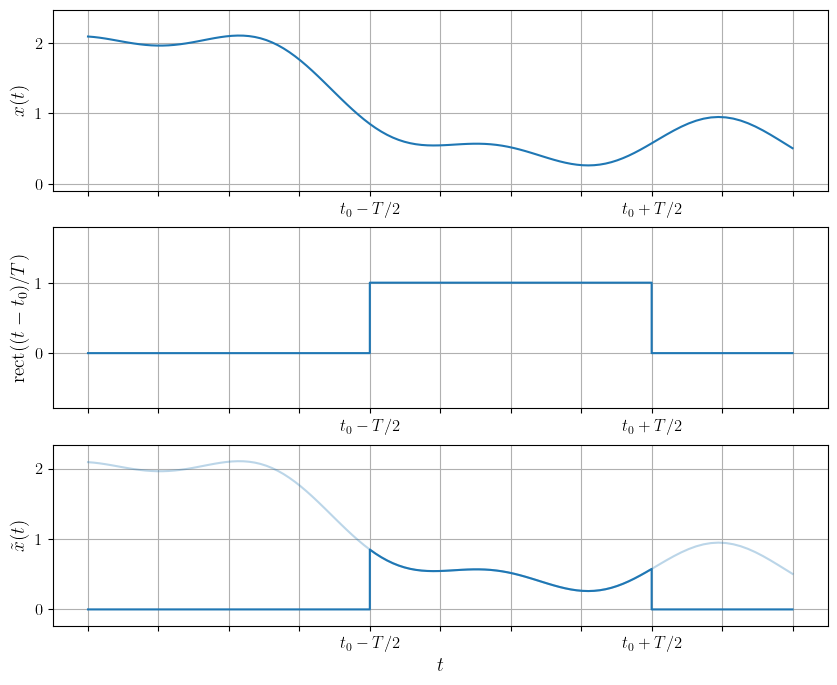

In [7]:
# Porte

# Limites de la porte
t1, t2 = -1, 3

# Temps (très échantillonné près de t1 et t2)
eps = 1e-6
t = np.concatenate([
    np.linspace(-5,t1-eps,50),
    np.linspace(t1+eps,t2-eps,50),
    np.linspace(t2+eps,5,20),
])

fig, axs = subplots(3,1, figsize=(10,8))

# Signal
x = 1+.5*np.sin(.8*t-2) - np.sin(.2*t) + .2*np.sin(2*t)
axs[0].plot(t, x, "C0")
axs[0].set_ylabel("$x(t)$")

# Porte
w = np.where((t>=t1)&(t<=t2),1,0)
axs[1].plot(t, w, "C0")
axs[1].set_ylabel("$\\mathrm{rect}((t-t_0)/T)$")

# Signal fenêtré
y = x * w
axs[2].plot(t, x, "C0", alpha=.3)
axs[2].plot(t, y, "C0")
axs[2].set_xlabel("$t$")
axs[2].set_ylabel("$\\tilde{x}(t)$")

for i in range(3):
    axs[i].axis('equal')
    axs[i].set_xticks(range(-5,6))
    axs[i].set_xticklabels(["","","","","$t_0-T/2$","","","","$t_0+T/2$","",""])
# # ax.set_yticks(range(-5,6))

savefig(f"fenetre.svg")
show()

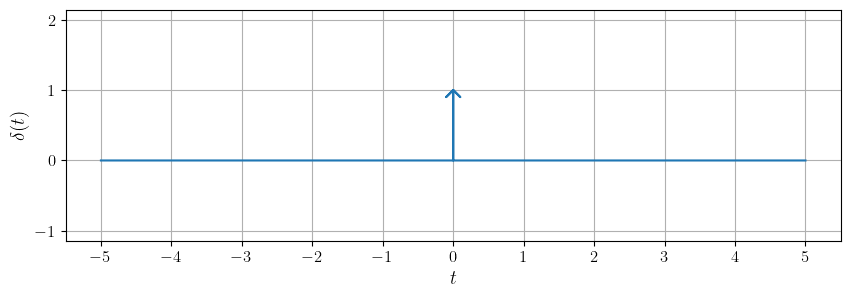

In [8]:
# Impulsion de Dirac

x = .1#.2
y = .9#.95
n = [-5, 0, 0, -x, 0, x, 0, 0, 5]
d = [ 0, 0, 1,  y, 1, y, 1, 0,  0]

fig, ax = subplots(1,1, figsize=(10,3))

ax.plot(n,d)
ax.set_xlabel("$t$")
ax.set_ylabel("$\\delta(t)$")
ax.set_xticks(range(-5,6))
ax.set_yticks(range(-5,6))
ax.axis('equal')
savefig(f"dirac.svg")
show()

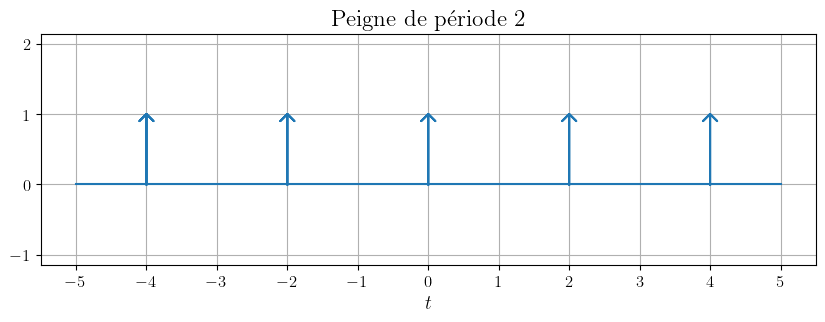

In [9]:
# Flèche
x = .1
y = .9
arrow_x = np.array([0, 0, -x, 0, x, 0, 0])
arrow_y = np.array([0, 1,  y, 1, y, 1, 0])

# Couleur
prop_cycle = rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
clr = colors[0]

# Affichage
fig, ax = subplots(1,1, figsize=(10,3))
ax.plot([-5, 5], [0, 0])
T = 2
for i in range(-4, 6, T):
    ax.plot(arrow_x+i, arrow_y, color=clr)
ax.set_xlabel("$t$")
# ax.set_ylabel("$\cha(t)")
ax.set_title(f"Peigne de période {T}")
ax.set_xticks(range(-5,6))
ax.set_yticks(range(-5,6))
ax.axis('equal')
savefig(f"peigne.svg")
show()